<div style="text-align: center"> Université de La Réunion - Master Energie - M1
<div style="text-align: center"> S4PH120 | 1 | Simulation Numérique et Multiphysique CiTDTP-2

## Utilisation de Python pour résoudre des EDP (suite)


### Projet 1 - La méthode des différences finies

#### Exercice 2 (Q. 5) - Résolution de l'équation de convection

**Eléments de syntaxe :**

1. Importer les modules requis (```numpy``` pour la manipulation des vecteurs et des matrices et ```matplotlib.pyplot``` pour les représentations graphiques).



2. Définir les constantes et données du problème. Application : $a = 0,b = 1, c = 4, J = 40, N = 60, \sigma = 0.8$.



3. Définir le vecteur discret $x$ en utilisant la fonction ```linspace``` de ```numpy```. Définir le pas de discrétisation en espace, $\delta x$.



4. A partir de $\sigma$, définir le pas de discrétisation en temps, $\delta t$. Définir le vecteur discret $t$ en utilisant la fonction ```arange``` de ```numpy```.

Rappel : $\sigma = \frac{c \delta t}{\delta x}$


5. Définir la fonction ```u0(x)``` pour la condition initiale, $u_0(x) = x$.



6. Définir la fonction ```phi(t)``` pour la condition à la limite (CL) bord gauche, $\varphi(t) = \sin(10 \pi t)$.



7. Définir la fonction ```sol_ex(x,T,a,b,c)``` qui renvoie ```u(x,T)``` solution exacte de l'équation de convection à l'instant $T$.


![Sol_ex](Sol_ex_Eq_Convection.jpg)

8. Représenter la solution exacte pour différentes valeurs de $t = n \delta t$. Application : prendre $n = 10, 20, 30, 40, 50$.



9. Implémenter le schéma numérique en vous appuyant sur l'algorithme suivant (**nota : la boucle sur $j$ pour $j$ définissant l'intérieur du domaine, est imbriquée dans la boucle sur $n$**) :


![Schema_Numerique](Schema_Numerique_Eq_Convection.jpg)

10. Représenter la solution approchées pour différentes valeurs de $t = n \delta t$. Application : prendre $n = 10, 20, 30, 40, 50$.


11. Que se passe-t-il si on prend $\sigma = 1.$ ? puis $\sigma = 1.1$ ? Conclure.

Elements de correction (figures à reproduire, ici pour $\sigma = 0.8$)

![Sol_app](Sol_app_Eq_Convection.jpg)


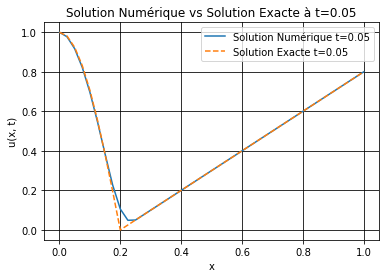

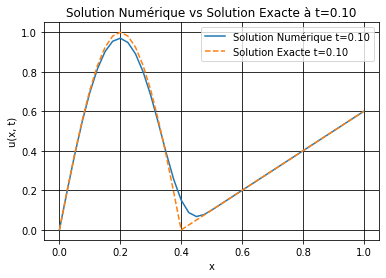

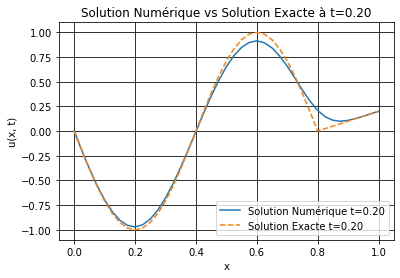

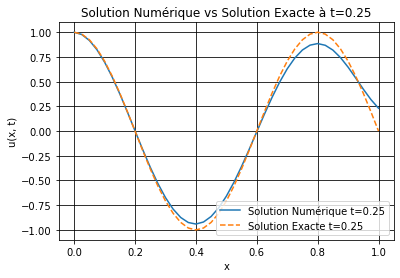

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les constantes et données du problème
a = 0
b = 1
c = 4
J = 40
N = 60
sigma = 0.8

# Discrétisation en espace (vecteur x) et en temps (vecteur t)
x = np.linspace(a, b, J+1)
delta_x = (b - a) / J

delta_t = sigma * delta_x / c
t = np.arange(0, N * delta_t + delta_t, delta_t)

# Définir la condition initiale u0(x) = x
def u0(x):
    return x

# Définir la condition à la limite (CL) bord gauche phi(t) = sin(10*pi*t)
def phi(t):
    return np.sin(10 * np.pi * t)

# Définir la fonction sol_ex(x, T, a, b, c) qui renvoie u(x, T) solution exacte de l'équation de convection à l'instant T
def sol_ex(x, T, a, b, c):
    u = np.zeros_like(x)   # Tableau u
    for i in range(len(x)):
        if x[i] - c * T > a:
            u[i] = u0(x[i] - c * T)
        else:
            u[i] = phi(T - (x[i] - a) / c)
    return u

# Initialisation de la matrice u pour stocker la solution approchée
u = np.zeros((N+1, J+1))

# Condition initiale
for j in range(J+1):
    u[0, j] = u0(x[j])

# Schéma numérique
for n in range(N):
    for j in range(1, J+1):
        u[n+1, j] = u[n, j] - sigma * (u[n, j] - u[n, j-1])
    
    # Condition à la limite bord gauche
    u[n+1, 0] = phi(t[n+1])

    
# Valeurs de temps spécifiques que vous souhaitez afficher
times_to_display = [0.05, 0.10, 0.20, 0.25]

# Affichage graphique pour les valeurs spécifiques de t
for n in range(N+1):
    if any(abs(t[n] - time) < 1e-5 for time in times_to_display):
        T = t[n]
        
        # Adapter la dimension de x pour correspondre à la solution exacte
        x_exact = np.linspace(a, b, J+1)  # Utilisez J+1 pour correspondre à la dimension de u[n, :]
        plt.figure()
        plt.plot(x_exact, u[n, :], "-", label=f'Solution Numérique t={T:.2f}')
        
        # Calcul de la solution exacte à l'instant T
        u_exact = sol_ex(x_exact, T, a, b, c)
        plt.plot(x_exact, u_exact, "--", label=f'Solution Exacte t={T:.2f}')
        
        plt.xlabel('x')
        plt.ylabel('u(x, t)')
        plt.title(f'Solution Numérique vs Solution Exacte à t={T:.2f}')
        plt.legend()
        plt.grid(color="k")
        plt.show()

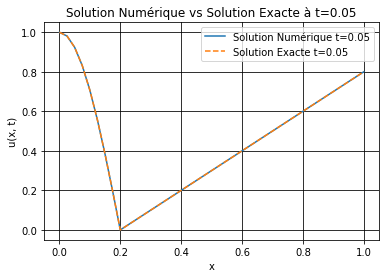

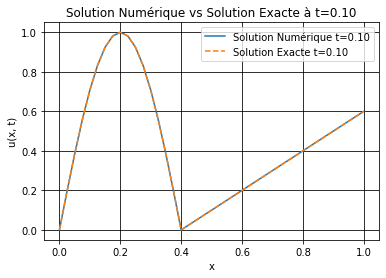

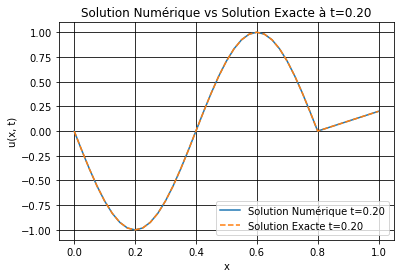

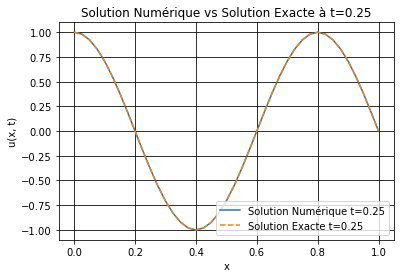

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les constantes et données du problème
a = 0
b = 1
c = 4
J = 40
N = 60
sigma = 1

# Discrétisation en espace (vecteur x) et en temps (vecteur t)
x = np.linspace(a, b, J+1)
delta_x = (b - a) / J

delta_t = sigma * delta_x / c
t = np.arange(0, N * delta_t + delta_t, delta_t)

# Définir la condition initiale u0(x) = x
def u0(x):
    return x

# Définir la condition à la limite (CL) bord gauche phi(t) = sin(10*pi*t)
def phi(t):
    return np.sin(10 * np.pi * t)

# Définir la fonction sol_ex(x, T, a, b, c) qui renvoie u(x, T) solution exacte de l'équation de convection à l'instant T
def sol_ex(x, T, a, b, c):
    u = np.zeros_like(x)   # Tableau u
    for i in range(len(x)):
        if x[i] - c * T > a:
            u[i] = u0(x[i] - c * T)
        else:
            u[i] = phi(T - (x[i] - a) / c)
    return u

# Initialisation de la matrice u pour stocker la solution approchée
u = np.zeros((N+1, J+1))

# Condition initiale
for j in range(J+1):
    u[0, j] = u0(x[j])

# Schéma numérique
for n in range(N):
    for j in range(1, J+1):
        u[n+1, j] = u[n, j] - sigma * (u[n, j] - u[n, j-1])
    
    # Condition à la limite bord gauche
    u[n+1, 0] = phi(t[n+1])

    
# Valeurs de temps spécifiques que vous souhaitez afficher
times_to_display = [0.05, 0.10, 0.20, 0.25]

# Affichage graphique pour les valeurs spécifiques de t
for n in range(N+1):
    if any(abs(t[n] - time) < 1e-5 for time in times_to_display):
        T = t[n]
        
        # Adapter la dimension de x pour correspondre à la solution exacte
        x_exact = np.linspace(a, b, J+1)  # Utilisez J+1 pour correspondre à la dimension de u[n, :]
        
        plt.figure()
        plt.plot(x_exact, u[n, :], "-", label=f'Solution Numérique t={T:.2f}')
        
        # Calcul de la solution exacte à l'instant T
        u_exact = sol_ex(x_exact, T, a, b, c)
        plt.plot(x_exact, u_exact, "--", label=f'Solution Exacte t={T:.2f}')
        
        plt.xlabel('x')
        plt.ylabel('u(x, t)')
        plt.title(f'Solution Numérique vs Solution Exacte à t={T:.2f}')
        plt.legend()
        plt.grid(color="k")
        plt.show()

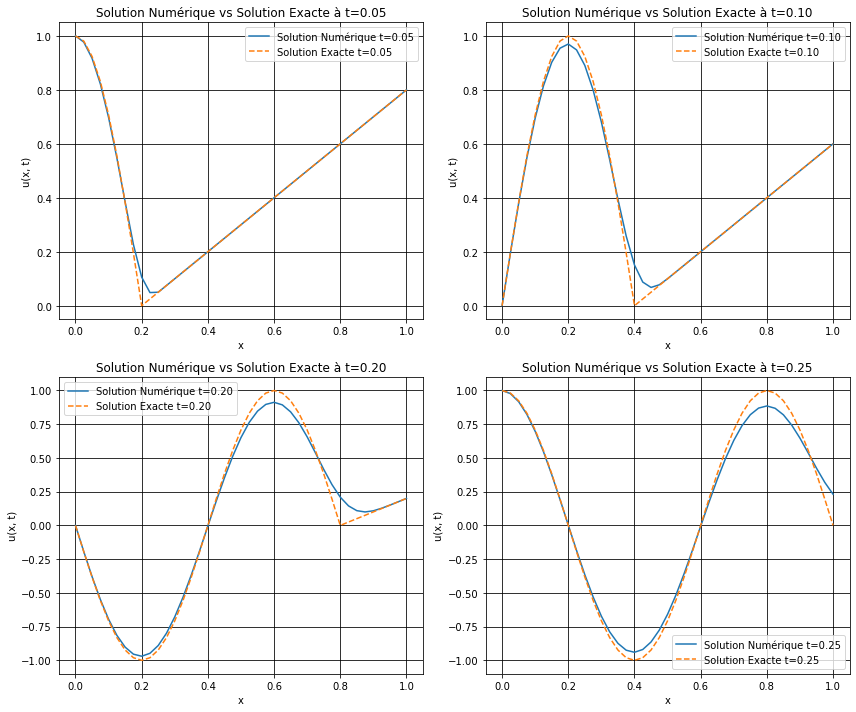

In [21]:
# Valeurs de temps spécifiques que vous souhaitez afficher
times_to_display = [0.05, 0.10, 0.20, 0.25]

# Créer une figure avec une grille de 2x2 pour les graphiques
plt.figure(figsize=(12, 10))  # Ajuster la taille de la figure

for idx, time in enumerate(times_to_display, 1):
    T = None
    for n in range(N+1):
        if abs(t[n] - time) < 1e-5:
            T = t[n]
            break

    # Adapter la dimension de x pour correspondre à la solution exacte
    x_exact = np.linspace(a, b, J+1)  # Utilisez J+1 pour correspondre à la dimension de u[n, :]

    # Créer un sous-graphique dans la grille 2x2
    plt.subplot(2, 2, idx)

    # Tracer la solution numérique
    plt.plot(x_exact, u[n, :], "-", label=f'Solution Numérique t={T:.2f}')

    # Calculer et tracer la solution exacte à l'instant T
    u_exact = sol_ex(x_exact, T, a, b, c)
    plt.plot(x_exact, u_exact, "--", label=f'Solution Exacte t={T:.2f}')

    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.title(f'Solution Numérique vs Solution Exacte à t={T:.2f}')
    plt.legend()
    plt.grid(color="k")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


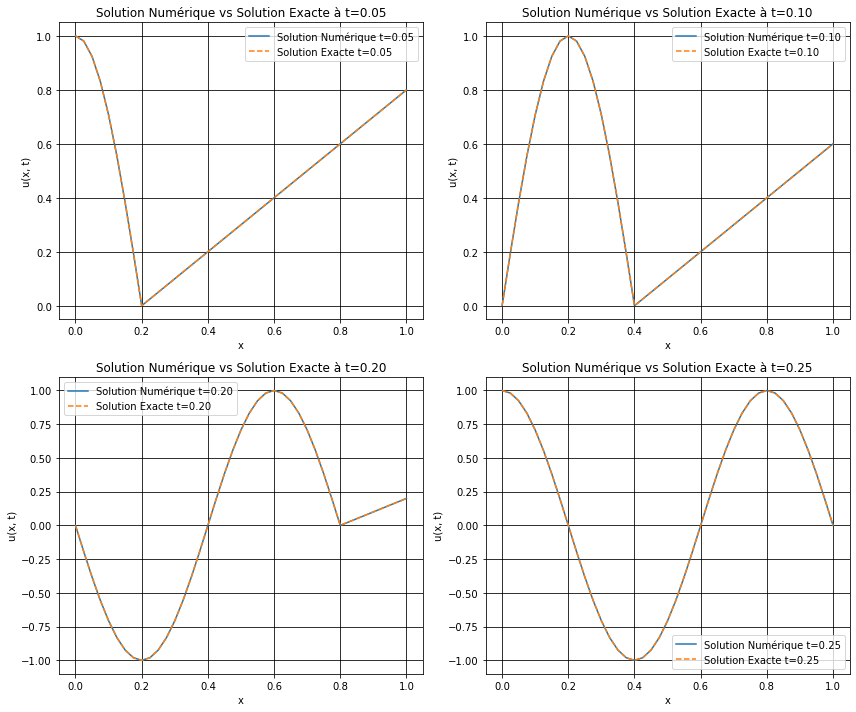

In [5]:
# Valeurs de temps spécifiques que vous souhaitez afficher
times_to_display = [0.05, 0.10, 0.20, 0.25]

# Créer une figure avec une grille de 2x2 pour les graphiques
plt.figure(figsize=(12, 10))  # Ajuster la taille de la figure

for idx, time in enumerate(times_to_display, 1):
    T = None
    for n in range(N+1):
        if abs(t[n] - time) < 1e-5:
            T = t[n]
            break

    # Adapter la dimension de x pour correspondre à la solution exacte
    x_exact = np.linspace(a, b, J+1)  # Utilisez J+1 pour correspondre à la dimension de u[n, :]

    # Créer un sous-graphique dans la grille 2x2
    plt.subplot(2, 2, idx)

    # Tracer la solution numérique
    plt.plot(x_exact, u[n, :], "-", label=f'Solution Numérique t={T:.2f}')

    # Calculer et tracer la solution exacte à l'instant T
    u_exact = sol_ex(x_exact, T, a, b, c)
    plt.plot(x_exact, u_exact, "--", label=f'Solution Exacte t={T:.2f}')

    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    plt.title(f'Solution Numérique vs Solution Exacte à t={T:.2f}')
    plt.legend()
    plt.grid(color="k")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()
